In [9]:
include(raw"testar/PointGenerators.jl")
include(raw"testar/Solvers.jl")
include(raw"testar/UsefulFunctions.jl")
include("/Users/00eila01/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Numerical-Solvers/PlotFunctions.jl")

PlotPipPlot (generic function with 1 method)

In [4]:
x₀ = [0.0, 1.0, 0.0]
θ = 10; μ = 28; β = 8/3;
epsilon_vals = zeros(20)
for i=1:10
    epsilon_vals[i] = -10.0^(-i)
    epsilon_vals[21-i] = 10.0^(-i)
end
p=[θ,μ,β]
t = 5
Δt = 10^(-3)

0.001

In [6]:
N=Integer(40/Δt)
Mavg = zeros(length(epsilon_vals),N+1)

20×40001 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [10]:
initial_vals = PointsOnSphere(1, 0, x₀')
X = LorenzSolutionFixedTimeStep(p, Δt, N, x₀, RK4)

3×40001 Matrix{Float64}:
 0.0  0.00994565  0.0197852   0.0295224   …  -12.4251  -12.4746  -12.5237
 1.0  0.99914     0.998558    0.99825        -17.3936  -17.4023  -17.4093
 0.0  4.97443e-6  1.97997e-5  4.43383e-5      25.8285   25.976    26.1241

In [11]:
for k = 1:length(epsilon_vals)
    print(k)
    initial_vals=PointsOnSphere(1, 0, x₀')
    M1 = PointSolutions([θ,μ+epsilon_vals[k],β],Δt,N,initial_vals,RK4)
    M = CorrelationMatrix_InitPos(M1,X)
    Mavg[k,:] = M
end

12

34

56

78

910

1112

1314

1516

1718

1920

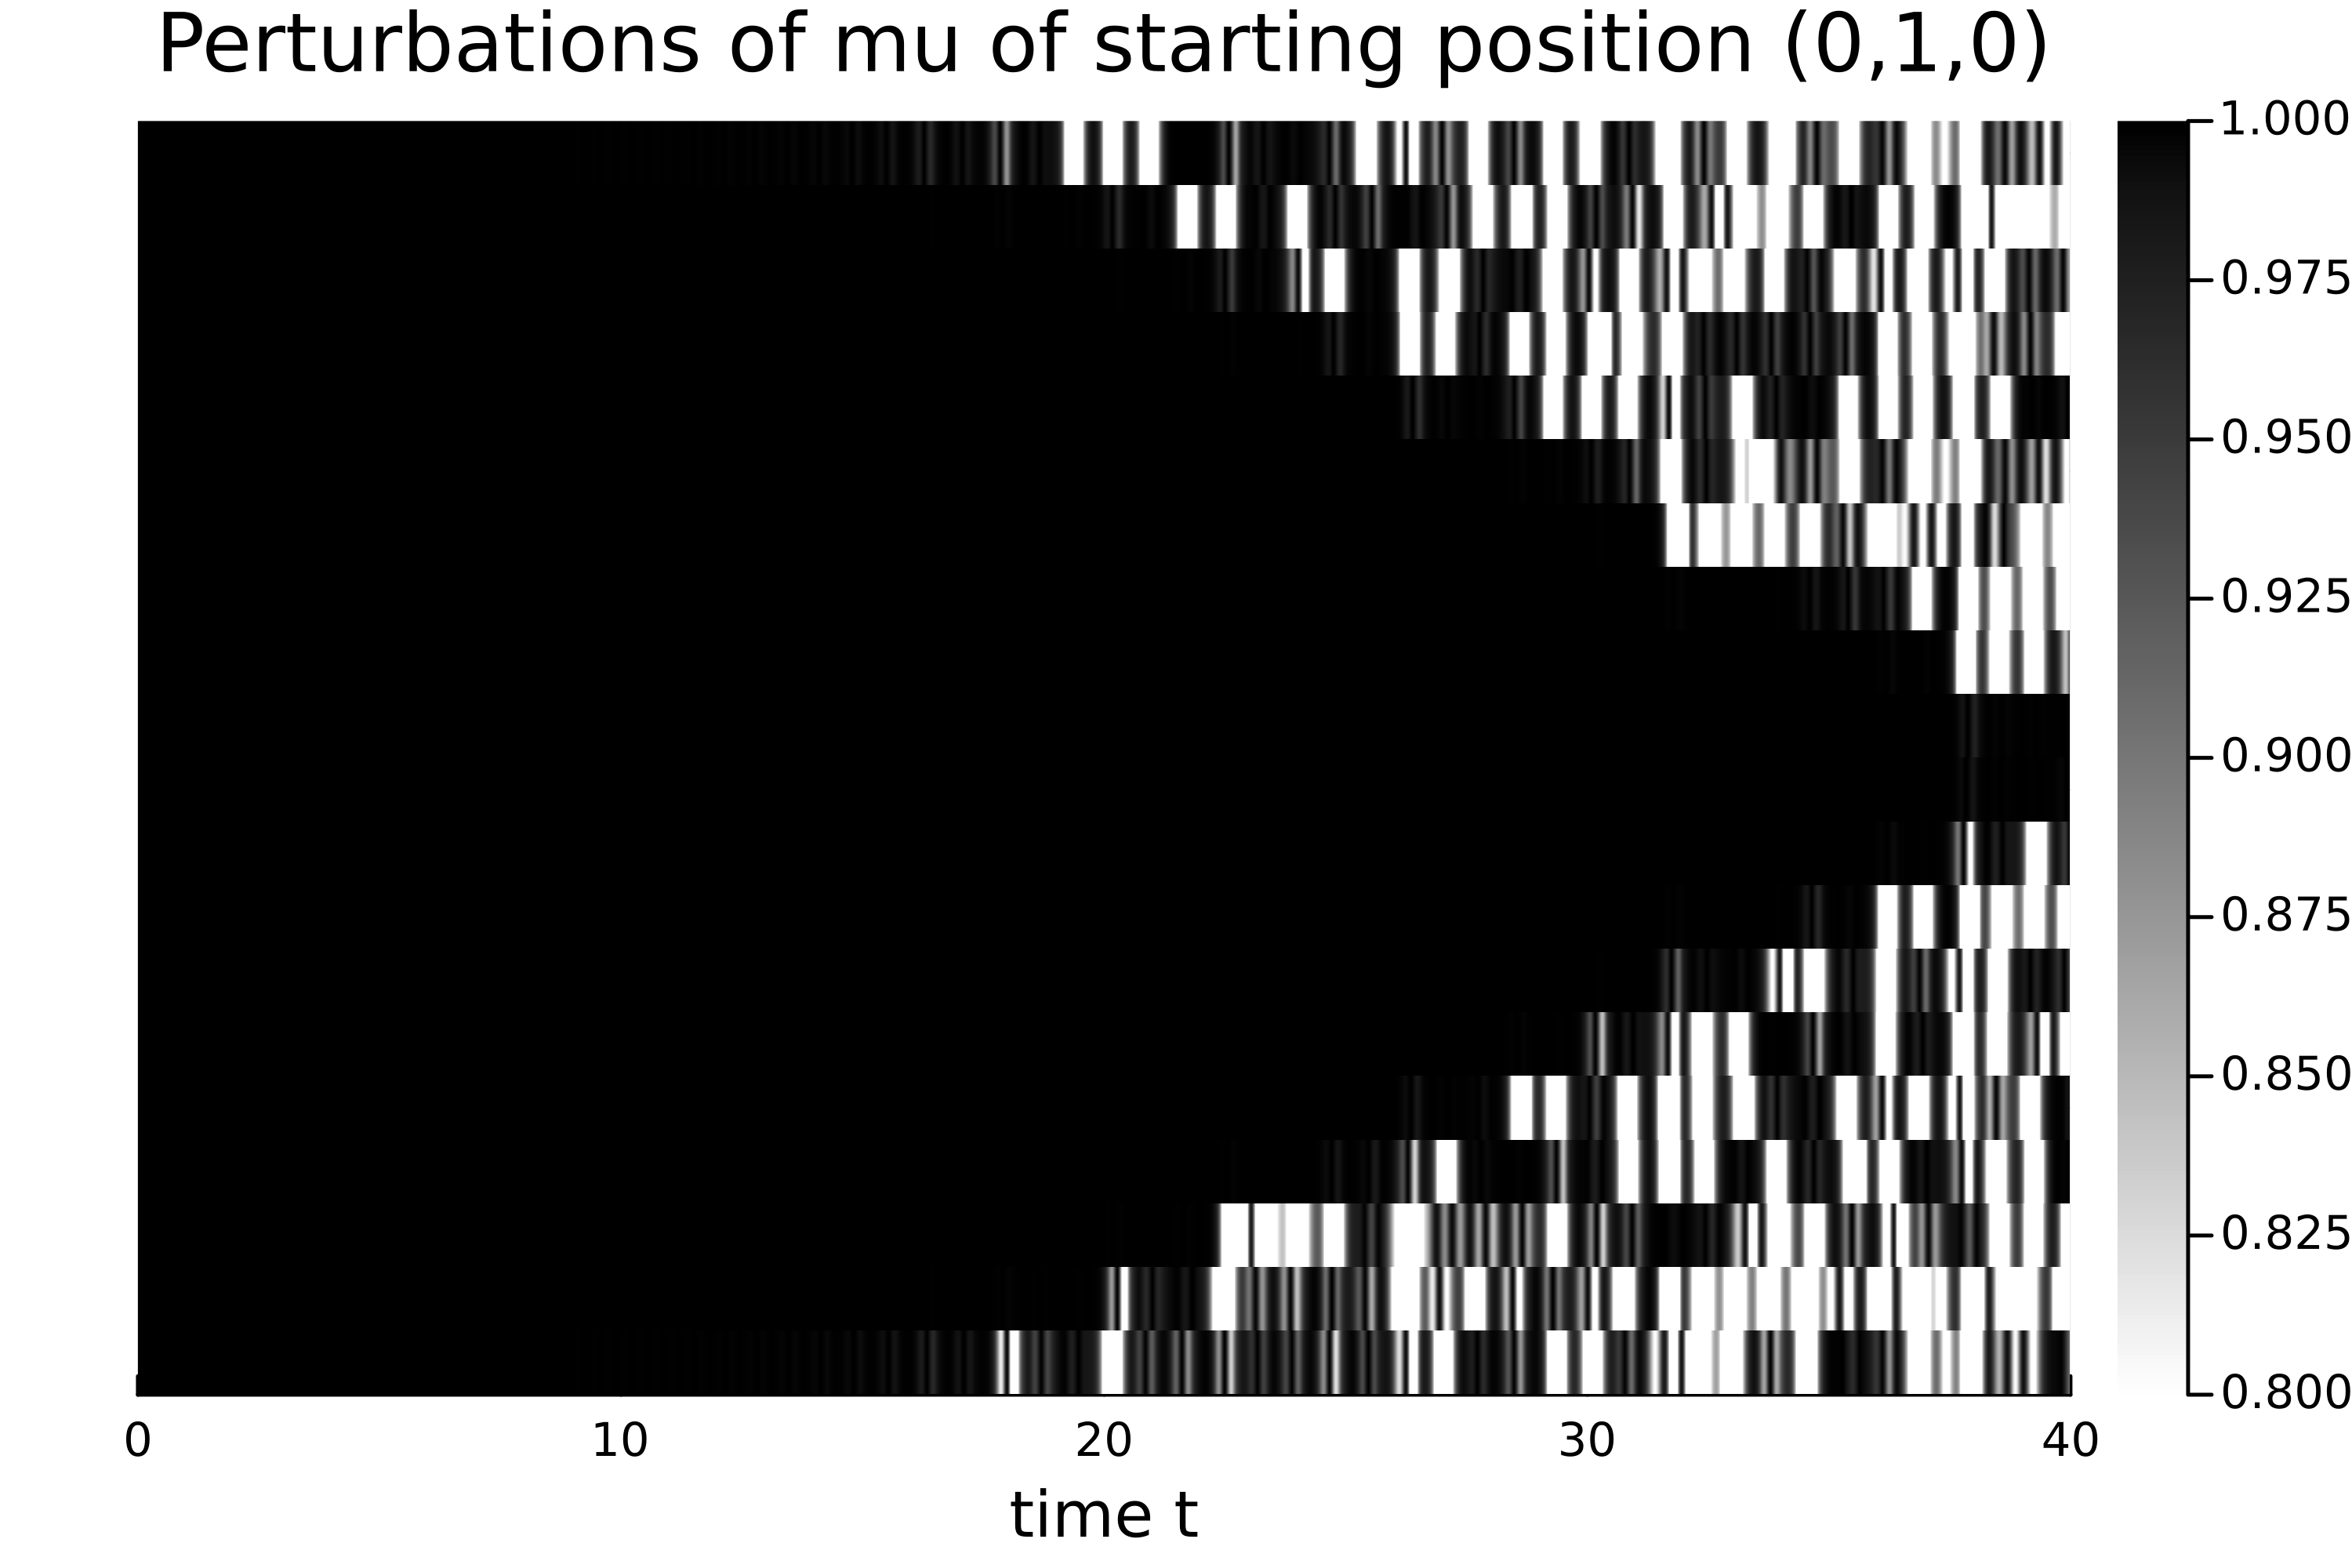

In [14]:
PlotPipPlot(Mavg,Δt,clim=(0.8,1),title="Perturbations of mu of starting position (0,1,0)")

In [15]:
savefig("plots/perturbations_mu.png")

"/Users/00eila01/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Sensitivity-Analysis/plots/perturbations_mu.png"